# Example: How to run PyRayHF trace_ray_cartesian_stratified

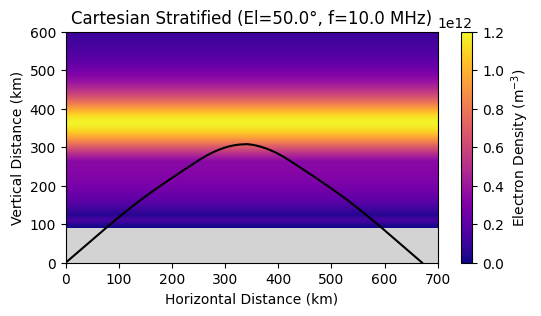

In [ ]:
#!/usr/bin/env python
# --------------------------------------------------------
# Distribution Statement A. Approved for public release.
# Distribution is unlimited.
# This work was supported by the Office of Naval Research.
# --------------------------------------------------------
"""Example of PyRayHF Cartesian 2-D Stratified Raytracing.
"""

import numpy as np
import pickle
import matplotlib.pyplot as plt
from PyRayHF.library import trace_ray_cartesian_stratified

# Load an ionospheric profile
# See Example_Generate_Input_Arrays for how to create input
# arrays using PyIRI.
file_open = 'Example_input.p'
input_arrays = pickle.load(open(file_open, 'rb'))

# Define inputs
elevation_deg = 50.
f0_Hz = 10e6

# Trace Using Cartesian 2-D Stratified Raytracing
x_full, z_full = trace_ray_cartesian_stratified(
    f0_Hz=f0_Hz,                  # in Hz
    elevation_deg=elevation_deg,  # in degrees
    alt_km=input_arrays['alt'],   # in km
    Ne=input_arrays['den'],       # in m-3
    Babs=input_arrays['bmag'],    # in Tesla
    bpsi=input_arrays['bpsi'],    # in radians
    mode="O"
)

# Plot the results.
# Create 2D density grid (Ne assumed horizontally uniform)
nx = 500
xmax = np.max(x_full) * 1.1
x_grid = np.linspace(0, xmax, nx)
z_grid = input_arrays['alt']
Xg, Zg = np.meshgrid(x_grid, z_grid)
Ne_grid = np.tile(input_arrays['den'][:, np.newaxis], (1, nx))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 3)
ax_plot = ax
ax_plot.set_xlim(0, 700)
ax_plot.set_ylim(0, 600)
ax_plot.set_facecolor("lightgray")
ax_plot.set_ylabel('Vertical Distance (km)')
ax_plot.set_xlabel('Horizontal Distance (km)')
vmin = 0
vmax = 1.2e12
color_ticks = np.arange(vmin, vmax + 2e11, 2e11)
pc = ax_plot.pcolormesh(Xg, Zg, Ne_grid, shading='auto',
                        cmap='plasma', vmin=vmin, vmax=vmax)
ax_plot.plot(x_full, z_full, c='black')
ax_plot.set_title(f"Cartesian Stratified (El={elevation_deg:.1f}°, f={f0_Hz/1e6} MHz)")
plt.colorbar(pc, label='Electron Density (m$^{-3}$)', ax=ax_plot,
             ticks=color_ticks)
plt.show()